 Evan A. Warfel | 10.18.2022

# Why 42 Is a Good Minimum Sample Size

## Or, Diabolical Worst Case Sample Sizes

The assumption of finite variance is one of the assumptions powering the Central Limit Theorem. Classical / frequentist inferential statistics assumes normality to make a variety of statistical tests work. Assuming a diabolical world, full of Cauchy and not Normal distributions (i.e. distributions that are the ratio of two normally distributed random variables), what sample size would you need before being sure that what you are working with is normal data?

We can test this via simulation: let's draw various sample sizes from a cauchy distribution and see how big of the sample size we need before we can reliably say that our data is *not* normally distributed.

Note that this approach looks at the case of a single distribution, and not, for example, the difference in two means where the first is calculated from a sample drawn from a normal distribution and the second sample is drawn from a cauchy distribution.

(I'm aware that this is a pedantically cheeky exercise.)



#### What's a Cauchy distribution? 


"It describes the distribution of horizontal distances at which a line segment tilted at a random angle cuts the x-axis."

"If X and Y are variates with a normal distribution, then Z=X/Y"

-- https://mathworld.wolfram.com/CauchyDistribution.html


... it's a T distribution with 1 degree of freedom.

Basically, the tails of a cauchy distribution are "too thick" to keep samples drawn from it constrained to a nice, neat normal distribution. The assumption of finite variance, and thus the central limit theorem, doesn't apply.


#### Demo from Wikipedia:

In the following gif 5000 samples are drawn from from a Normal distribution (top) and Cauchy distribution (bottom.) As you can see, the law of large numbers (increased sample size => more precise estimates) doesn't apply to the bottom distribution!

![CauchyWikiDemo](https://upload.wikimedia.org/wikipedia/commons/a/aa/Mean_estimator_consistency.gif "cauchy")

In [160]:
CauchyVsNormal <- function(StartN,MaxN,NumbReps) {
                  #Draws various sample sizes from a cauchy distribution.
                  #The sample sizes range from StartN through MaxN.  These are each drawn *NumbReps* times.
                  #The Shaprio-wilks test of normality is run over each case, for each sample size. 
                  #The worst case / maximum p-value is retained.
                  max_p_values <- rep(NA, MaxN)
    
                  if (StartN<3) {
                      StartN<-3
                  }
                      

                  for (SampleSize in c(StartN:MaxN)){ #Shapiro is undefined for less than three cases
                  
                      
                    CauchyValues = matrix(rcauchy(SampleSize * NumbReps), nrow = NumbReps)
                    #CauchyValues is a matrix where each row represents
                    #one draw of size SampleSize from a Cauchy Dist.
                      
                    p_values = apply(CauchyValues,1,{function (x) shapiro.test(x)$p.value})
                    #p_values is a list of length NumbReps.
                      
                    max_p_values[SampleSize] <- max(p_values)
                          
                    #The Slower Way of Doing This:
                      
                    #p_values <- rep(NA,NumbReps)  
                    #for (j in c(1:NumbReps)) { 
                    #  
                    #    a <- rcauchy(i)
                    #    b <- shapiro.test(a)$p.value
                    #    p_values[j] <- b
                    #}
                }
                return(max_p_values)
            }

In [161]:
CauchyVsNormal(3,100,10) 
# The max p-value of the shapiro test for each sample size (given by the index). The third value is the max p-value
# taken from running a shapiro test on three numbers drawn from a cauchy distribution over 10 trials. The fourth
# value is the maximum p-value (e.g. the worst case scenario) from said 10 trails.

[1]           NA           NA 9.721280e-01 9.989728e-01 8.556850e-01
  [6] 7.995598e-01 9.544604e-01 8.661050e-01 2.588576e-01 9.430745e-01
 [11] 4.601762e-01 5.044253e-01 3.167602e-01 6.336638e-01 1.790600e-02
 [16] 1.281223e-01 1.301827e-01 6.271591e-02 8.497995e-01 9.582697e-01
 [21] 7.398054e-01 4.176965e-02 6.413878e-01 5.485729e-01 7.357201e-04
 [26] 6.240770e-02 1.818555e-01 1.305476e-02 2.513920e-06 3.803114e-04
 [31] 1.610318e-01 3.002554e-04 1.446523e-04 2.296807e-07 1.180351e-02
 [36] 2.148112e-02 1.065940e-03 1.536374e-02 6.544802e-05 1.218330e-02
 [41] 2.781484e-06 7.030189e-06 4.704485e-05 1.916408e-07 2.266366e-06
 [46] 3.704211e-06 3.467530e-07 1.393849e-05 7.091335e-08 1.052738e-02
 [51] 1.798543e-07 8.641386e-05 3.014729e-03 2.935320e-06 4.287995e-07
 [56] 4.001650e-07 3.398328e-05 3.078259e-07 4.638317e-10 6.020302e-06
 [61] 4.865236e-09 3.948750e-08 9.233284e-04 1.806960e-11 2.888363e-10
 [66] 7.081076e-06 4.667470e-07 4.559056e-08 1.553391e-10 3.975508e-08
 [71] 4.830639e-08 1.017578e-11 4.242833e-13 9.149406e-05 6.362206e-10
 [76] 9.382177e-11 1.018413e-06 2.109552e-11 2.424572e-11 3.639663e-09
 [81] 5.100134e-10 7.309301e-11 1.132941e-09 1.414406e-09 9.222110e-13
 [86] 5.019147e-05 8.500987e-08 4.194025e-12 5.195878e-13 1.600765e-11
 [91] 1.294924e-10 6.227021e-09 8.200825e-12 5.408400e-09 3.935267e-12
 [96] 5.578078e-09 2.851691e-12 2.633734e-11 6.294454e-11 5.462654e-17

In [162]:
# Next, let's find the smallest index that is less than .05,
# or the cutoff when the test can determine that the true distribution is not normal, by running the above 50 times. 

#But let us also run each individual experiment 100 times instead of 10 times:

CauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:length(CauchyRejectionIndex))) {
    CauchyRejectionIndex[i] <- min(which(CauchyVsNormal(3,100,100) <.05))
    }

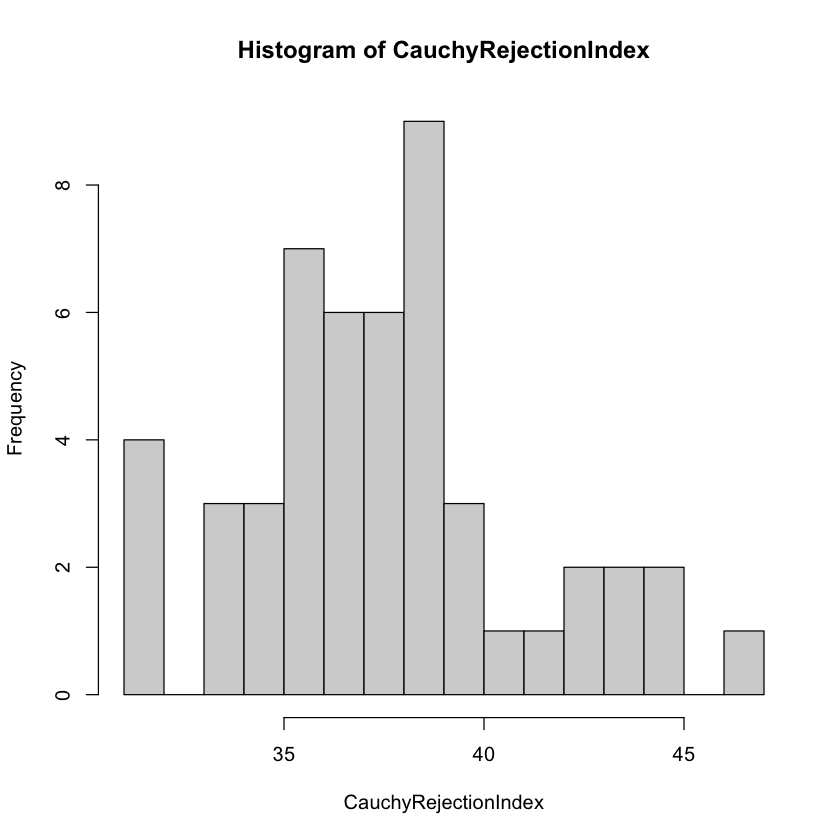

In [163]:
# Here's what this looks like for samples sizes of 100, repeated 100 times
hist(CauchyRejectionIndex,breaks=12)

In [164]:
mean(CauchyRejectionIndex)

[1] 38.02

In [165]:
sd(CauchyRejectionIndex)

[1] 3.536919

In [204]:
range(CauchyRejectionIndex)

[1] 31 47

This might make you think that ~38 is a good minimum sample size after which you can reliably detect normality.

HOWEVER:

Due to what I assume is the lack of finite variance in the underlying distribution, it turns out that the mean / center of our histogram turns out to be dependent on... the number of times we repeate the experiment for each sample size!

In [116]:
SecondCauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:length(SecondCauchyRejectionIndex))) {
    #print(i)
    SecondCauchyRejectionIndex[i] <- min(which(CauchyVsNormal(20,60,200) <.05))
    #Instead of looking at 100 repetitions like we did previously, 
    # we'll look at 200 samples, double the previous value.
    }

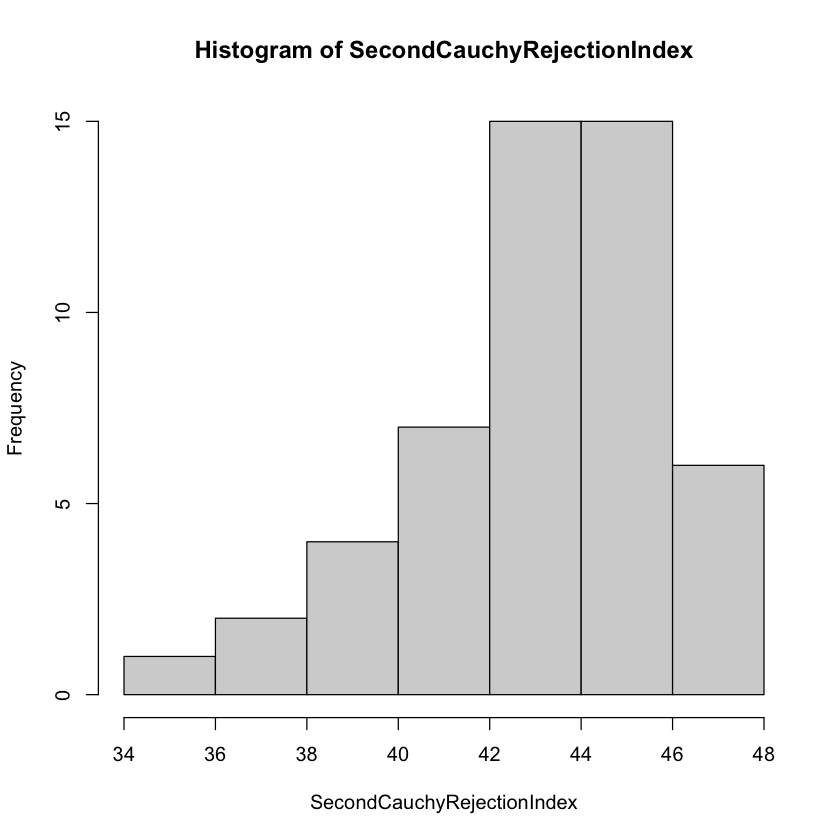

In [117]:
hist(SecondCauchyRejectionIndex,breaks=8)

In [118]:
mean(SecondCauchyRejectionIndex)

[1] 43.52

In [119]:
sd(SecondCauchyRejectionIndex)

[1] 2.742262

In [120]:
max(SecondCauchyRejectionIndex)

[1] 48

In [121]:
ThirdCauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:length(ThirdCauchyRejectionIndex))) {
    #print(i)
    ThirdCauchyRejectionIndex[i] <- min(which(CauchyVsNormal(25,65,400) <.05))
    #Instead of looking at 200 samples like we did previously, 
    #we'll look at 400 samples (double the previous value, again)
    }

Does this mean there is no safe sample size to be 100% certain that what you are dealing with is normally distributed?
Or might these values approach some sort of limit?

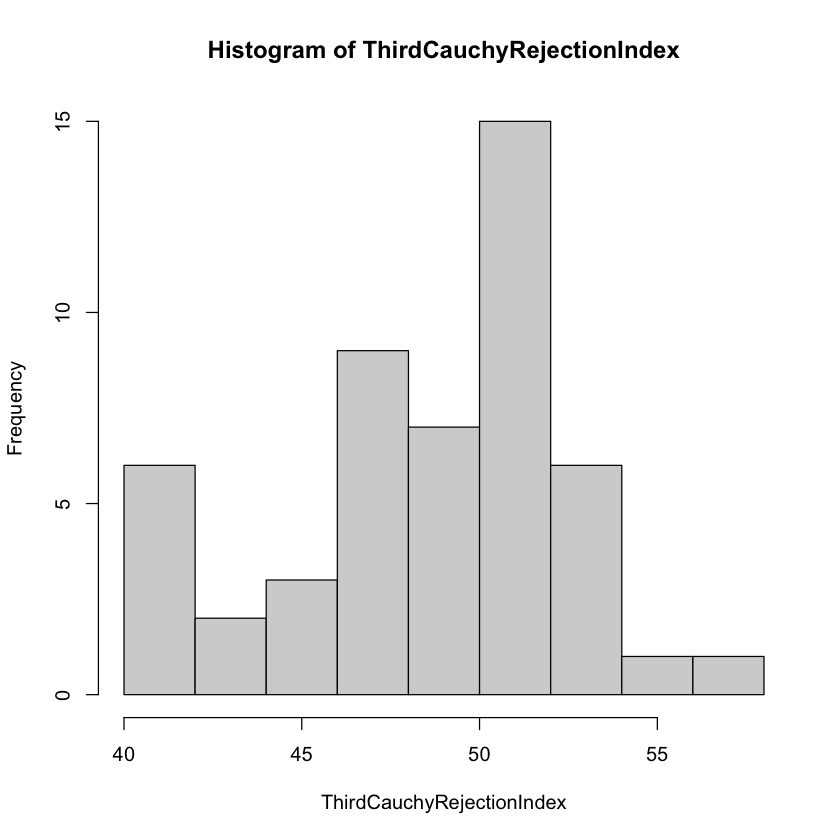

In [122]:
hist(ThirdCauchyRejectionIndex)

In [123]:
mean(ThirdCauchyRejectionIndex)

[1] 49.1

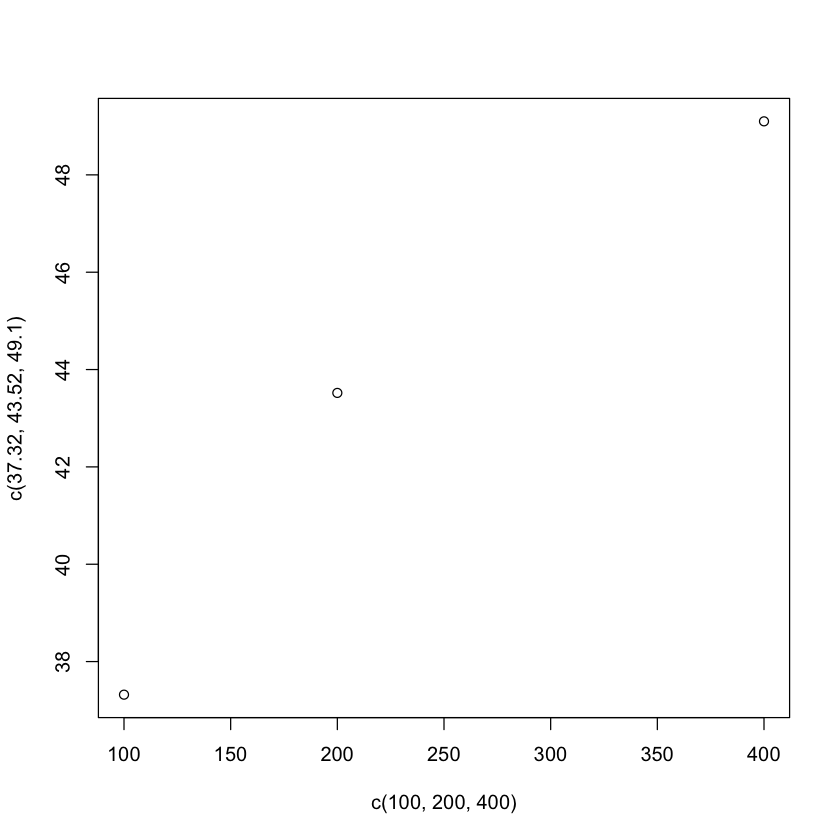

In [136]:
plot(c(100,200,400),c(37.32,43.52,49.1))

In [137]:
#Potentially some sort of limit? Let's gather more data points:

In [127]:
FourthCauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:length(FourthCauchyRejectionIndex))) {
    FourthCauchyRejectionIndex[i] <- min(which(CauchyVsNormal(25,69,800) <.05))
    }

In [128]:
mean(FourthCauchyRejectionIndex)

[1] 54.58

In [130]:
min(FourthCauchyRejectionIndex) #We'll use the min and max to guide the limits for the Fifth Index..

[1] 48

In [131]:
max(FourthCauchyRejectionIndex)

[1] 64

In [132]:
FifthCauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:50)) {
    FifthCauchyRejectionIndex[i] <- min(which(CauchyVsNormal(44,77,1600) <.05))
    }

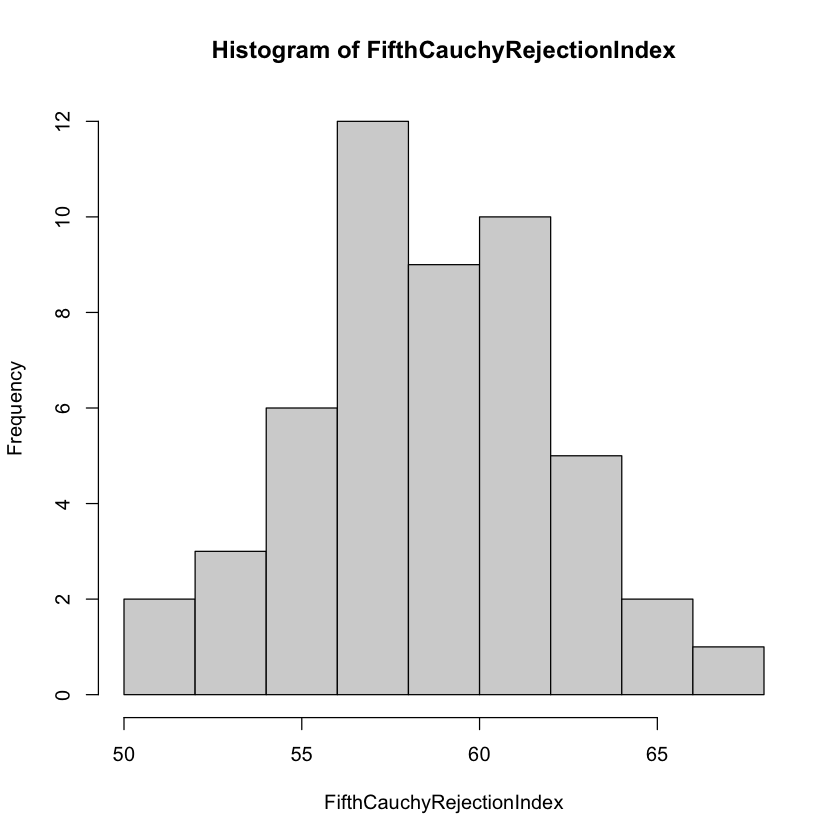

In [133]:
hist(FifthCauchyRejectionIndex)

In [134]:
mean(FifthCauchyRejectionIndex)

[1] 59.14

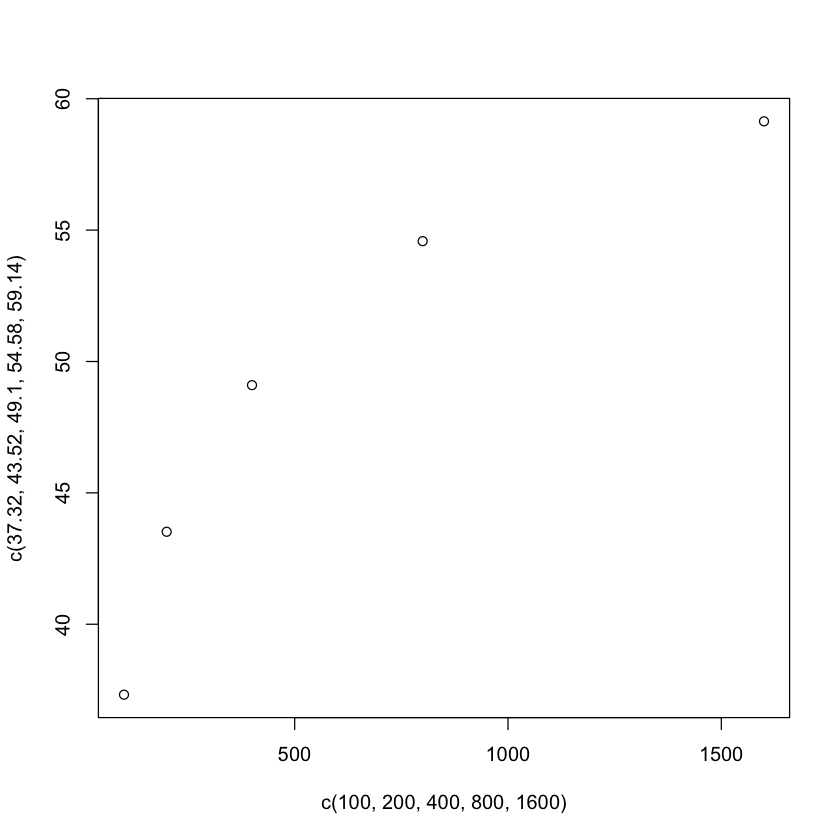

In [139]:
plot(c(100,200,400,800,1600),c(37.32,43.52,49.1,54.58,59.14))

In [140]:
range(FifthCauchyRejectionIndex)

[1] 50 67

In [221]:
LastCauchyRejectionIndex <- rep(NA, 50)
for (i in c(1:50)) {
    LastCauchyRejectionIndex[i] <- min(which(CauchyVsNormal(45,85,10000) <.05))
    }

#This code is so slow...maybe this loop could be made faster via some sort of paralleliztion or an apply?

In [222]:
range(LastCauchyRejectionIndex)

[1] 66 81

In [223]:
mean(LastCauchyRejectionIndex)

[1] 74.5

In [224]:
sd(LastCauchyRejectionIndex)

[1] 3.575712

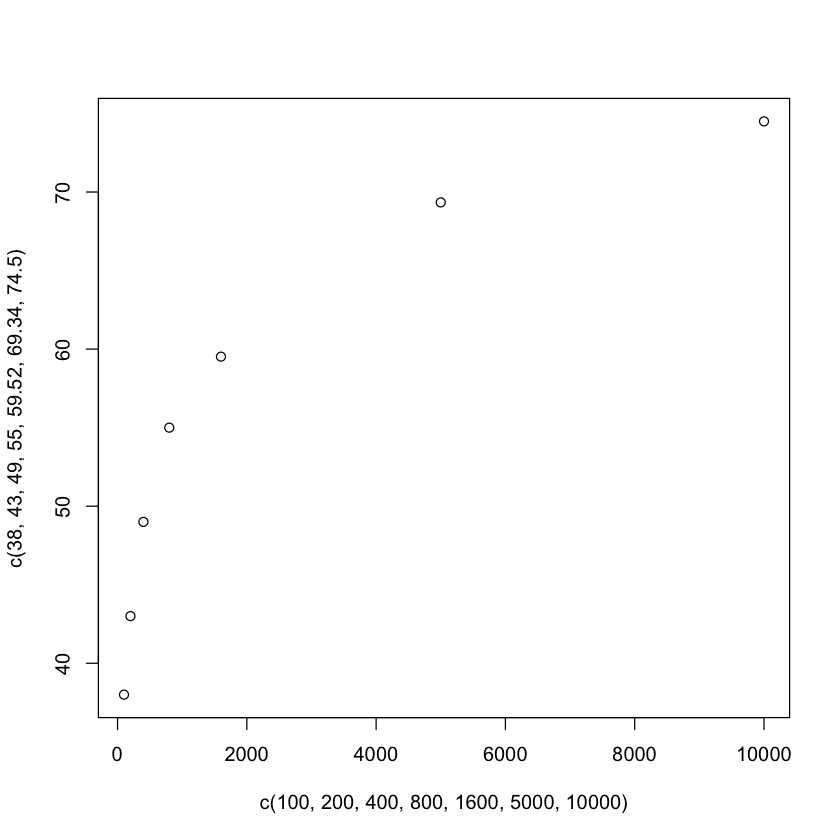

In [226]:
plot(c(100,200,400,800,1600,5000,10000),c(38,43,49,55,59.52,69.34,74.5))

In [ ]:
#this looks like a logarthmic curve... which... doesn't have a limit...

In [227]:
max(LastCauchyRejectionIndex)

[1] 81

With the limited compute resources I have at my disposal, a minimum sample size of 85 (81 plus a completely made up fudge factor of 4) should cover almost all cases to very high level of certainty. Feel free to blame this conclusion on the fact that I've only had a few weeks of training in graduate level statistics. Q.E.D ???

__________

The code above was for an extreme case: wanting to be dead certain about data that will, practically speaking, likely contain some amount of random error. A better and more tractable approach would be to pick a percentage of the time you want to be right. Let's use 99% as our acceptable threshold.

In [229]:
CauchyVsNormalPERCENTAGE <- function(StartN,MaxN,NumbReps) {
                  #For a sweep of sample sizes, this function returns the percentage of the time that 
                  #the test of normality accurately identifies non-normal data
                  percent_p_values <- rep(NA, MaxN)
    
                  if (StartN<3) {
                      StartN<-3
                  }
                  for (SampleSize in c(StartN:MaxN)){
                  
                    CauchyValues = matrix(rcauchy(SampleSize * NumbReps), nrow = NumbReps)
                    #CauchyValues is a matrix where each row represents one draw of size SampleSize from a Cauchy Dist.
                      
                    p_values = apply(CauchyValues,1,{function (x) shapiro.test(x)$p.value})
                    #p_values is a list of length NumbReps.
                      
                    percent_p_values[SampleSize] <- sum(p_values>.05)/length(p_values)
                   
                    #I wonder if this loop could be parallelized...
                }
                return(percent_p_values)
            }

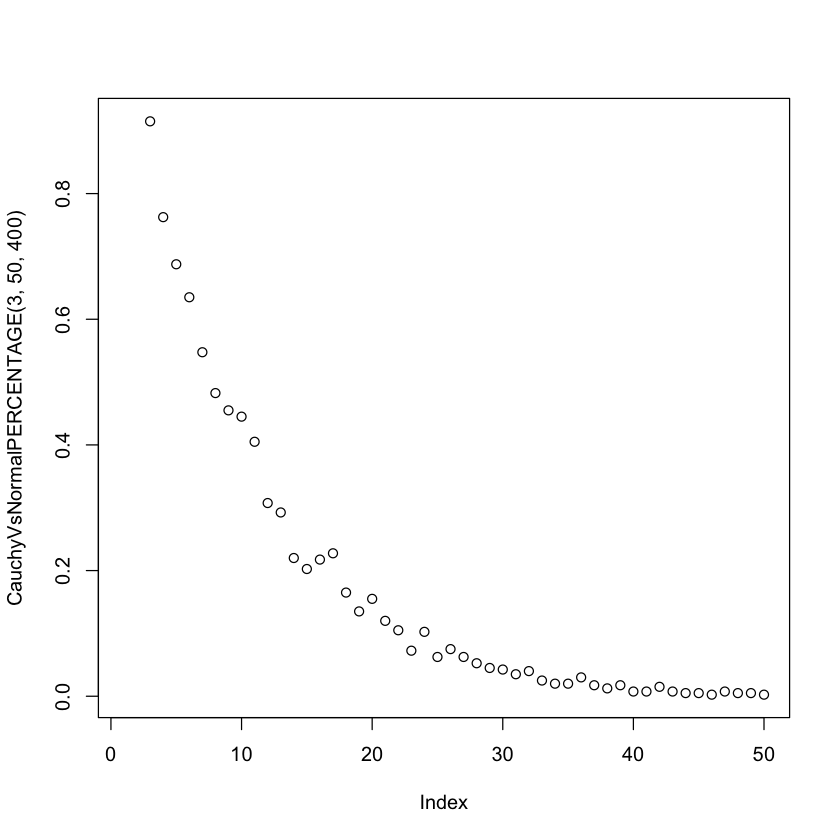

In [247]:
plot(CauchyVsNormalPERCENTAGE(3,50,400))
#the percent of the time the data are incorrectly diagnosed as being normal, where 'index' = the sample size
#BUT: will these percentages change as we run the experiments more times?

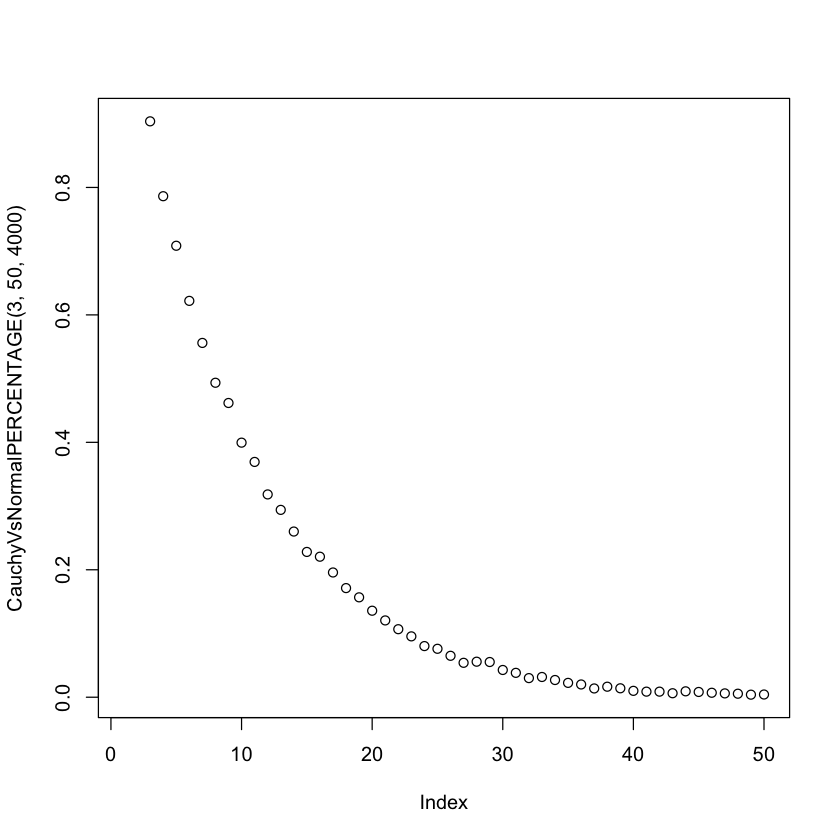

In [248]:
plot(CauchyVsNormalPERCENTAGE(3,50,4000))

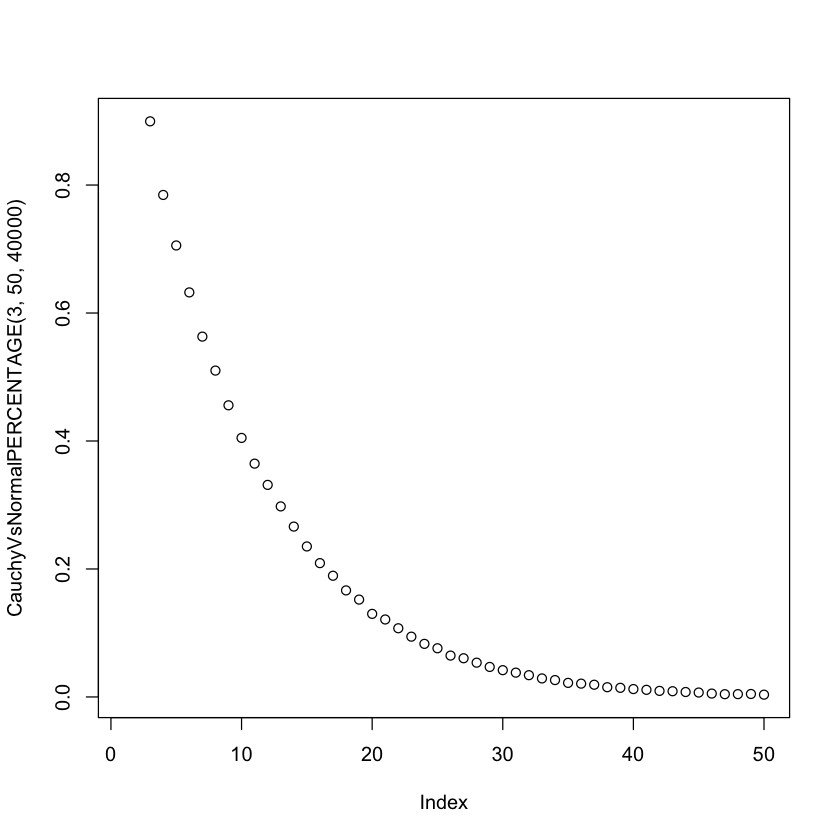

In [253]:
plot(CauchyVsNormalPERCENTAGE(3,50,40000))

In [251]:
min(which(CauchyVsNormalPERCENTAGE(3,50,1000)<.01)) # note that this should be run in a loop
# if you wanted a 99% chance of being right about cauchy vs. normally distributed data, you'd need..

[1] 41

In [252]:
min(which(CauchyVsNormalPERCENTAGE(39,50,20000)<.01)) 

[1] 43

In [260]:
CauchyRejectionIndex_at99Percent <- rep(NA, 50)
for (i in c(1:50)) {
    CauchyRejectionIndex_at99Percent[i] <- min(which(CauchyVsNormalPERCENTAGE(40,60,10000) <.01))
    }


In [262]:
CauchyRejectionIndex_at99Percent

[1] 42 42 42 42 42 42 41 41 42 42 41 42 42 42 43 41 42 42 43 42 42 42 42 42 43
[26] 42 43 42 42 43 42 41 42 41 41 42 41 43 41 42 43 42 43 42 43 43 41 42 42 42

In [263]:
mean(CauchyRejectionIndex_at99Percent)

[1] 42

In [269]:
#Maybe 42 really is the answer to life, the universe, and everything.

#Please send any and all complaints to Michael V. Drake, Head of the UC System. <- Just kidding, don't do that.